In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
def lineal(x, a, b):
  return a*x + b

In [ ]:
gsheet = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vT3jhJnPWZIt19_4UzwKruLdz7sRCqg1dr1A4sd8YaEVEkYYwnvR3ar_-hvSyDIj5J0P8_K_TfSqvcg/pub?output=csv'
data = pd.read_csv(gsheet, decimal='.')
y = data['y (mm)'].to_numpy()
A = data['Amplitud A (mV)'].to_numpy()
B = data['Amplitud B (mV)'].to_numpy()
I = data['Amplitud interferencia (mV)'].to_numpy()
fase_A = data['Fase A (grados)'].to_numpy()*np.pi/180
fase_B = data['Fase B (grados)'].to_numpy()*np.pi/180
fase_AB = data['Fase AB (grados)'].to_numpy()
I_err = data['Escala juntos'].to_numpy()/6
AB_err = data['Escala_Separados (mV)'].to_numpy()/6
fase_err = np.ones(len(fase_A))*1.5*np.pi/180
h = 45 #68
L = 380 #350
Frec = 40.2
V_in = 4000
fase_A[2] = -1*fase_A[2]
fase_A[5] = -1*fase_A[5]
l = 8.58

In [ ]:
P = []
for i in range(len(A)):
  P.append((A[i]**2+B[i]**2+2*A[i]*B[i]*np.cos(fase_B[i]-fase_A[i]))**0.5)

In [ ]:
dP_dA = []
for i in range(len(A)):
  dP_dA.append((A[i]+B[i]*np.cos(fase_B[i]-fase_A[i]))/(A[i]**2+B[i]**2+2*A[i]*B[i]*np.cos(fase_B[i]-fase_A[i]))**0.5)

dP_dB = []
for i in range(len(A)):
  dP_dB.append((B[i]+A[i]*np.cos(fase_B[i]-fase_A[i]))/(A[i]**2+B[i]**2+2*A[i]*B[i]*np.cos(fase_B[i]-fase_A[i]))**0.5)

dP_dphiA = []
for i in range(len(A)):
  dP_dphiA.append((A[i]*B[i]*np.sin(fase_B[i]-fase_A[i]))/(A[i]**2+B[i]**2+2*A[i]*B[i]*np.cos(fase_B[i]-fase_A[i]))**0.5)

dP_dphiB = []
for i in range(len(A)):
  dP_dphiB.append(-1*(A[i]*B[i]*np.sin(fase_B[i]-fase_A[i]))/(A[i]**2+B[i]**2+2*A[i]*B[i]*np.cos(fase_B[i]-fase_A[i]))**0.5)

P_err = []
for i in range(len(A)):
  P_err.append(((dP_dA[i]*AB_err[i])**2+(dP_dB[i]*AB_err[i])**2+(dP_dphiA[i]*fase_err[i])**2+(dP_dphiB[i]*fase_err[i])**2)**0.5)

(None, <matplotlib.legend.Legend at 0x7961b447bd00>)

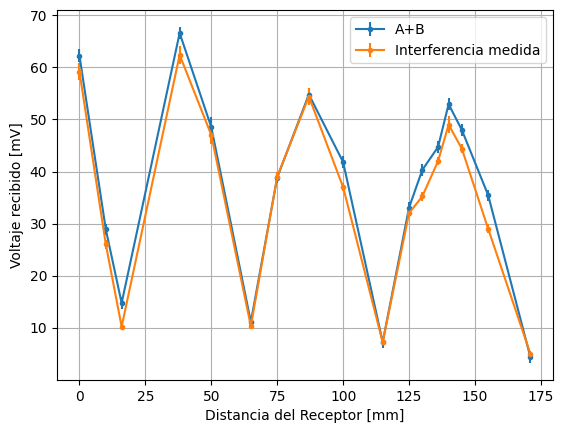

In [ ]:
plt.figure()
plt.errorbar(y, P, yerr=P_err, fmt='.-', label = "A+B")
plt.errorbar(y, I, yerr=I_err, fmt='.-', label = "Interferencia medida")
plt.xlabel("Distancia del Receptor [mm]")
plt.ylabel("Voltaje recibido [mV]")
plt.grid(), plt.legend()

(None, <matplotlib.legend.Legend at 0x7961b23d9210>)

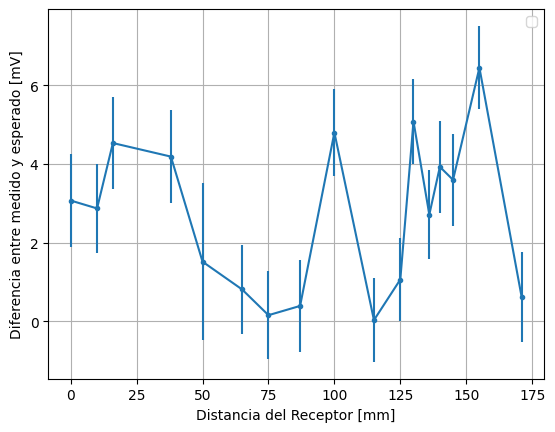

In [ ]:
plt.figure()
plt.errorbar(y, abs(P - I), yerr=P_err, fmt='.-')
#plt.errorbar(y, I, yerr=I_err, fmt='.-', label = "Interferencia medida")
plt.xlabel("Distancia del Receptor [mm]")
plt.ylabel("Diferencia entre medido y esperado [mV]")
plt.grid(), plt.legend()

(None, <matplotlib.legend.Legend at 0x7961b0a76470>)

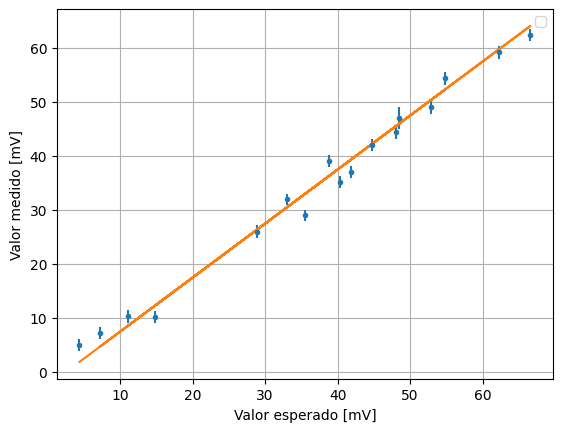

In [ ]:
plt.figure()
plt.errorbar(P, I, yerr=P_err, fmt='.')
plt.plot(P, P-2.5*np.ones(len(P)))
#plt.errorbar(y, I, yerr=I_err, fmt='.-', label = "Interferencia medida")
plt.xlabel("Valor esperado [mV]")
plt.ylabel("Valor medido [mV]")
plt.grid(), plt.legend()

In [ ]:
i_fs = [y[7]-y[3],y[13]-y[7], y[5]-y[2], y[9]-y[5], y[16]-y[9]]
i_f = 0
for i in range(len(i_fs)):
  i_f = i_f + i_fs[i]
i_f = i_f/len(i_fs)
i_fs, i_f

([49.0, 53.0, 49.0, 50.0, 56.0], 51.4)

In [ ]:
delta_1 = []
for i in range(len(y)):
  delta_1.append(0.5*((L**2+(y[i]+h/2)**2)**0.5-(L**2+(y[i]-h/2)**2)**0.5))

delta_2 = []
for i in range(len(y)):
  delta_2.append(h*0.5*y[i]/(L**2+y[i]**2)**0.5)

delta_3 = []
for i in range(len(y)):
  delta_3.append(h*y[i]/(2*L))

In [ ]:
P_1 = []
for i in range(len(y)):
  P_1.append((A[i]+B[i])*abs(np.cos(2*np.pi*delta_1[i]/5.53)))

P_2 = []
for i in range(len(y)):
  P_2.append((A[i]+B[i])*abs(np.cos(2*np.pi*delta_1[i]/5.53+0.5)))

(None, <matplotlib.legend.Legend at 0x7961b0aeb340>)

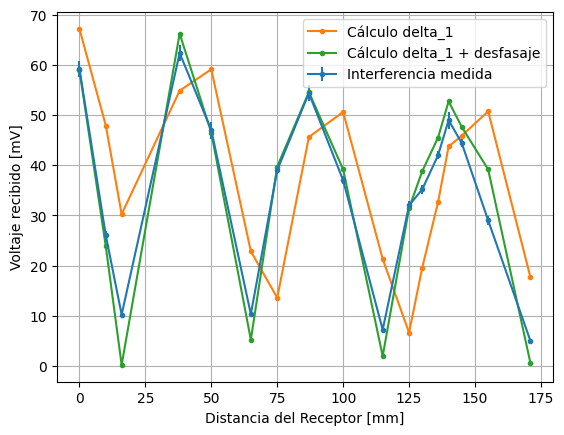

In [ ]:
plt.figure()
#plt.errorbar(y, P, yerr=P_err, fmt='.-', label = "A+B")
plt.errorbar(y, I, yerr=I_err, fmt='.-', label = "Interferencia medida")
plt.plot(y, P_1, '.-', label = "Cálculo delta_1")
plt.plot(y, P_2, '.-', label = "Cálculo delta_1 + desfasaje")
plt.xlabel("Distancia del Receptor [mm]")
plt.ylabel("Voltaje recibido [mV]")
plt.grid(), plt.legend()

El valor de lamda obtenido es ( 5.532821296461568 +/- 0.14142135772885897 ) mm


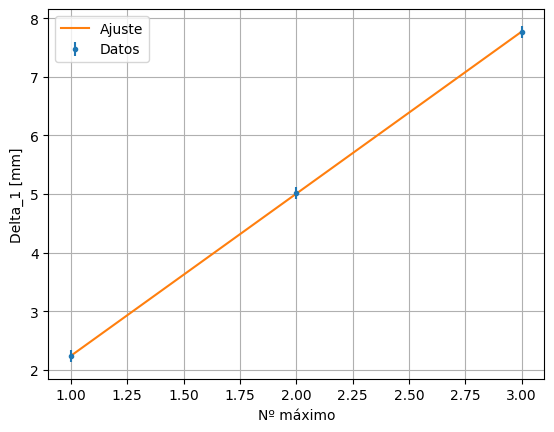

In [ ]:
#Voy a graficar delta_max en función de lamda/2 * m. En los mínimos se cumple que delta_min = m * lambda/2 + lambda/4
y_max = [y[3], y[7], y[13]]
#y_min = [y[2], y[5], y[9], y[16]]
m = np.array([1, 2, 3])
delta_1max = [delta_1[3], delta_1[7], delta_1[13]]
delta_1max_err = 0.1*np.ones(len(delta_1max))
#delta_1min = [delta_1[2], delta_1[5], delta_1[9], delta_1[16]]
params, cov = curve_fit(lineal, m, delta_1max, sigma=delta_1max_err, absolute_sigma=True)
err = np.sqrt(np.diag(cov))
y_fit = lineal(m, params[0], params[1])
plt.figure()
plt.errorbar(m, delta_1max,yerr=delta_1max_err, fmt='.', label = 'Datos')
plt.plot(m, y_fit, label = 'Ajuste')
plt.xlabel('Nº máximo')
plt.ylabel('Delta_1 [mm]')
plt.grid(), plt.legend()
lambda_1 = params[0]*2
print('El valor de lamda obtenido es (', params[0]*2, '+/-', err[0]*2, ') mm')

(None, <matplotlib.legend.Legend at 0x7961ae92d240>)

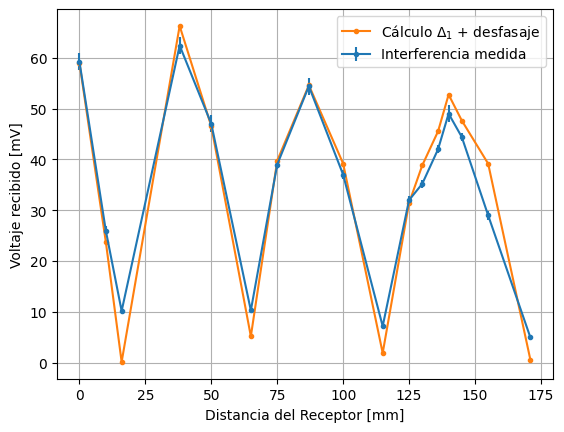

In [ ]:
P_1 = []
for i in range(len(y)):
  P_1.append((A[i]+B[i])*abs(np.cos(2*np.pi*delta_1[i]/5.53+0.5)))

plt.figure()
#plt.errorbar(y, P, yerr=P_err, fmt='.-', label = "A+B")
plt.errorbar(y, I, yerr=I_err, fmt='.-', label = "Interferencia medida")
#plt.plot(y, P_1, '.-', label = "Cálculo delta_1")
plt.plot(y, P_1, '.-', label = "Cálculo " r"$\Delta_1$" " + desfasaje")
plt.xlabel("Distancia del Receptor [mm]")
plt.ylabel("Voltaje recibido [mV]")
plt.grid(), plt.legend()

El valor de lamda obtenido es ( 5.539536895644852 +/- 0.16970562662908206 ) mm


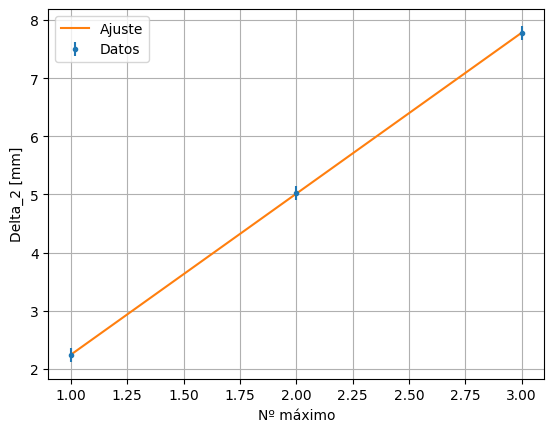

In [ ]:
#Voy a graficar delta_max en función de lamda/2 * m. En los mínimos se cumple que delta_min = m * lambda/2 + lambda/4
y_max = [y[3], y[7], y[13]]
#y_min = [y[2], y[5], y[9], y[16]]
m = np.array([1, 2, 3])
delta_2max = [delta_2[3], delta_2[7], delta_2[13]]
delta_2max_err = 0.12*np.ones(len(delta_2max))
#delta_1min = [delta_1[2], delta_1[5], delta_1[9], delta_1[16]]
params, cov = curve_fit(lineal, m, delta_2max, sigma=delta_2max_err, absolute_sigma=True)
err = np.sqrt(np.diag(cov))
y_fit = lineal(m, params[0], params[1])
plt.figure()
plt.errorbar(m, delta_2max, yerr=delta_2max_err, fmt='.', label = 'Datos')
plt.plot(m, y_fit, label = 'Ajuste')
plt.xlabel('Nº máximo')
plt.ylabel('Delta_2 [mm]')
plt.grid(), plt.legend()
lambda_2=params[0]*2
print('El valor de lamda obtenido es (', params[0]*2, '+/-', err[0]*2, ') mm')

(None, <matplotlib.legend.Legend at 0x7961ae890670>)

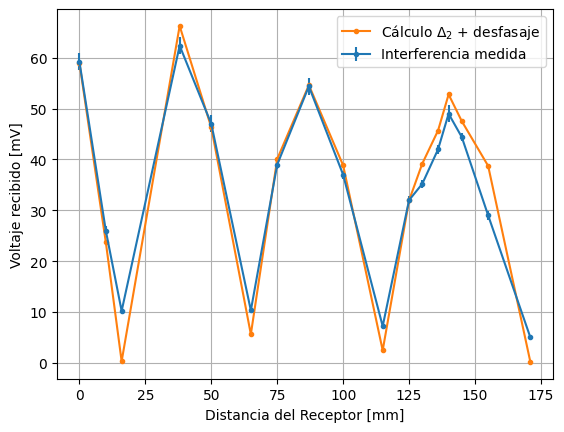

In [ ]:
P_2 = []
for i in range(len(y)):
  P_2.append((A[i]+B[i])*abs(np.cos(2*np.pi*delta_2[i]/5.53+0.5)))

plt.figure()
#plt.errorbar(y, P, yerr=P_err, fmt='.-', label = "A+B")
plt.errorbar(y, I, yerr=I_err, fmt='.-', label = "Interferencia medida")
#plt.plot(y, P_1, '.-', label = "Cálculo delta_1")
plt.plot(y, P_2, '.-', label = "Cálculo " r"$\Delta_2$" " + desfasaje")
plt.xlabel("Distancia del Receptor [mm]")
plt.ylabel("Voltaje recibido [mV]")
plt.grid(), plt.legend()

In [ ]:
delta_3_err = []
for i in range(len(delta_3)):
  delta_3_err.append(((y[i]/(2*L))**2+(h*y[i]/(2*L**2))**2+(h/(2*L))**2)**0.5)

El valor de lamda obtenido es ( 5.971543650970656 +/- 0.18658552305835718 ) mm


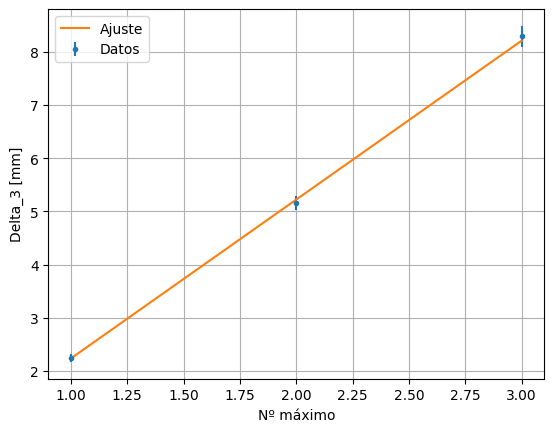

In [ ]:
#Voy a graficar delta_max en función de lamda/2 * m. En los mínimos se cumple que delta_min = m * lambda/2 + lambda/4
y_max = [y[3], y[7], y[13]]
#y_min = [y[2], y[5], y[9], y[16]]
m = np.array([1, 2, 3])
delta_3max = [delta_3[3], delta_3[7], delta_3[13]]
delta_3max_err = [delta_3_err[3], delta_3_err[7], delta_3_err[13]]
#delta_1min = [delta_1[2], delta_1[5], delta_1[9], delta_1[16]]
params, cov = curve_fit(lineal, m, delta_3max, sigma=delta_3max_err, absolute_sigma=True)
err = np.sqrt(np.diag(cov))
y_fit = lineal(m, params[0], params[1])
plt.figure()
plt.errorbar(m, delta_3max, yerr=delta_3max_err, fmt='.', label = 'Datos')
plt.plot(m, y_fit, label = 'Ajuste')
plt.xlabel('Nº máximo')
plt.ylabel('Delta_3 [mm]')
plt.grid(), plt.legend()
lambda_3 = params[0]*2
print('El valor de lamda obtenido es (', params[0]*2, '+/-', err[0]*2, ') mm')

(None, <matplotlib.legend.Legend at 0x7961ad443910>)

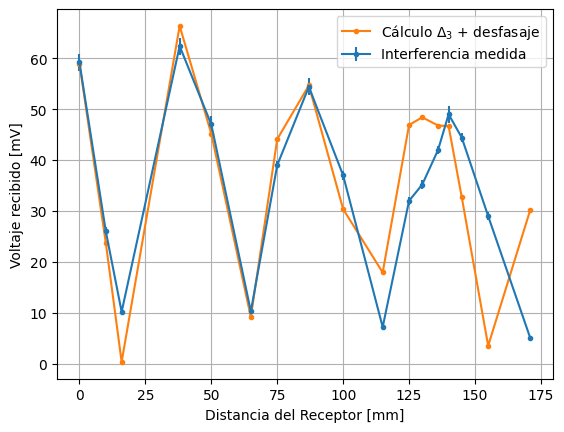

In [ ]:
P_3 = []
for i in range(len(y)):
  P_3.append((A[i]+B[i])*abs(np.cos(2*np.pi*delta_3[i]/5.53+0.5)))

plt.figure()
#plt.errorbar(y, P, yerr=P_err, fmt='.-', label = "A+B")
plt.errorbar(y, I, yerr=I_err, fmt='.-', label = "Interferencia medida")
#plt.plot(y, P_1, '.-', label = "Cálculo delta_1")
plt.plot(y, P_3, '.-', label = "Cálculo " r"$\Delta_3$" " + desfasaje")
plt.xlabel("Distancia del Receptor [mm]")
plt.ylabel("Voltaje recibido [mV]")
plt.grid(), plt.legend()